<a href="https://colab.research.google.com/github/cweinreich24/stock_time_series_analysis/blob/master/portfolio_analysis_mark_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests 
import json

In [ ]:
stock = requests.get(f'https://financialmodelingprep.com/api/v3/historical-price-full/MSFT')

In [ ]:
msft = stock.json()

In [ ]:
msft = msft['historical']
msft = pd.DataFrame.from_dict(msft)

KeyError: 'historical'

In [ ]:
prices = msft.sort_values(by='date')
prices.head()

,date,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime
0,2015-05-18,47.98,48.22,47.61,48.01,43.56,24136500.0,24136500.0,0.03,0.063,47.94667,"May 18, 15",0.00063
1,2015-05-19,47.56,47.81,47.18,47.58,43.45,28574800.0,28574800.0,0.02,0.042,47.52333,"May 19, 15",0.00042
2,2015-05-20,47.39,47.93,47.27,47.58,43.45,25047900.0,25047900.0,0.19,0.401,47.59333,"May 20, 15",0.00401
3,2015-05-21,47.28,47.60,47.01,47.42,43.30,22410700.0,22410700.0,0.14,0.296,47.34333,"May 21, 15",0.00296
4,2015-05-22,47.30,47.35,46.82,46.90,42.83,25720600.0,25720600.0,-0.40,-0.846,47.02333,"May 22, 15",-0.00846


In [ ]:
prices = prices[['date', 'open', 'high', 'low', 'close', 'adjClose']]

In [ ]:
prices['returns'] = prices['adjClose'].pct_change()
prices.tail()

,date,open,high,low,close,adjClose,returns
1254,2020-05-11,183.15,187.51,182.85,186.74,186.74,0.011154
1255,2020-05-12,186.80,187.04,182.30,182.51,182.51,-0.022652
1256,2020-05-13,182.55,184.05,176.54,179.75,179.75,-0.015122
1257,2020-05-14,177.54,180.69,175.68,180.53,180.53,0.004339
1258,2020-05-15,179.06,187.06,177.00,183.16,183.16,0.014568


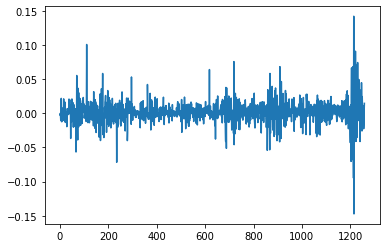

In [ ]:
prices['returns'].plot()
plt.show()

In [ ]:
percent_return = prices['returns']*100

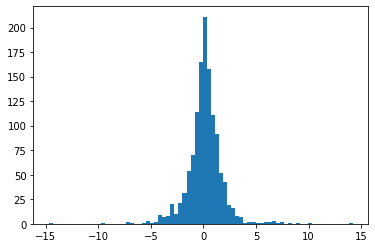

In [ ]:
returns_plot = percent_return.dropna()
plt.hist(returns_plot, bins=75)
plt.show()

# Compare Annual stock prices trends

In [ ]:
prices.head()

,date,open,high,low,close,adjClose,returns
0,2015-05-18,47.98,48.22,47.61,48.01,43.56,NaN
1,2015-05-19,47.56,47.81,47.18,47.58,43.45,-0.002525
2,2015-05-20,47.39,47.93,47.27,47.58,43.45,0.000000
3,2015-05-21,47.28,47.60,47.01,47.42,43.30,-0.003452
4,2015-05-22,47.30,47.35,46.82,46.90,42.83,-0.010855


In [ ]:
msft = prices[['date', 'adjClose']]

In [ ]:
# Convert date column into datetime series
msft.date = pd.to_datetime(msft.date)

C:\Users\Chris Weinreich\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
#Set datetime column as index
msft.set_index('date', inplace=True)

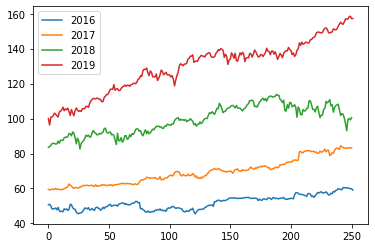

In [ ]:
returns = pd.DataFrame()

years = ['2016', '2017', '2018', '2019']
#Select data for each year and concat dataframes
for year in years:
    price_per_year = msft.loc[year, ['adjClose']].reset_index(drop=True)
    price_per_year.rename(columns={'adjClose': year}, inplace=True)
    returns = pd.concat([returns, price_per_year], axis=1)

returns.plot()
plt.show()

# Multi-Period Returns

In [ ]:
msft.columns

Index(['adjClose'], dtype='object')

In [ ]:
msft['daily_returns'] = msft['adjClose'].pct_change().mul(100)
msft['monthly_return'] = msft['adjClose'].pct_change(periods=30).mul(100)
msft['annual_return'] = msft['adjClose'].pct_change(periods=360).mul(100)

C:\Users\Chris Weinreich\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Chris Weinreich\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Chris Weinreich\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

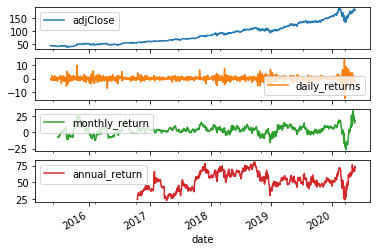

In [ ]:
msft.plot(subplots=True)
plt.show()

# Average Annualized Return=((1+μ)252)−1

# Mu

In [ ]:
#Get the average daily return of the stock
avg_return_daily = np.mean(prices['returns'])
avg_return_daily

0.001289904377058439

In [ ]:
# Get the annual averate return
avg_return_annualized = ((1+np.mean(prices['returns']))**252)-1
avg_return_annualized

0.38381812724510245

# Volatility

In [ ]:
#What is the standard deviation of the daily return on the stock
std_daily = np.std(prices['returns'])
std_daily

0.01719020533212225

In [ ]:
#daily variance
daily_variance = np.std(prices['returns'])**2
daily_variance

0.00029550315936052425

# Annualizing Variance

In [ ]:
#Annualize standard deviation
std_annual = std_daily * np.sqrt(252)

#Annualize variance
annual_variance = std_annual**2

print(std_annual, annual_variance)

0.27288604976959174 0.0744667961588521


# Skewness

In [ ]:
from scipy.stats import skew

In [ ]:
#Drop the missing value
clean_returns = prices['returns'].dropna()

In [ ]:
#Calculate the skewness of the returns distribution
returns_skewness = skew(prices['returns'].dropna())
returns_skewness

0.17837918467168487

# Kurtosis

In [ ]:
from scipy.stats import kurtosis

In [ ]:
#Calculate the exces kurtosis of the returns distribution
excess_kurtosis = kurtosis(clean_returns)
excess_kurtosis

12.172426973486132

In [ ]:
#Get the true fourth moment of the returns distribtion
fourth_moment = excess_kurtosis + 3
fourth_moment

15.172426973486132

# Statistical tests for normality

In [ ]:
from scipy.stats import shapiro

In [ ]:
#Run a Shapiro-Wilk test on the stock returns
shapiro_results = shapiro(clean_returns)
print('Shapiro results:', shapiro_results)

Shapiro results: (0.8749287128448486, 1.3241123837153935e-30)


In [ ]:
#What is the p-value from the Shapiro test
p_value = shapiro_results[1]
print('P-value:', p_value)

P-value: 1.3241123837153935e-30


In [ ]:
#The p-value is greater than zero, so the null hypothesis of normality is accepted

# Calculate Portfolio Returns

In [ ]:
def get_returns(ticker):
    stock = requests.get(f'https://financialmodelingprep.com/api/v3/historical-price-full/{ticker}')
    stock = stock.json()
    stock = stock['historical']
    stock = pd.DataFrame.from_dict(stock)
    stock = stock.sort_values(by='date')
    stock = stock[['date','adjClose']]
    stock = stock.rename(columns={'adjClose': ticker})
    stock = stock[ticker].pct_change()
    stock = pd.DataFrame(stock)
    return stock

In [ ]:
chase = get_returns('JPM')
visa = get_returns('V')
chase = get_returns('JPM')
visa = get_returns('V')
costco = get_returns('COST')
amd = get_returns('AMD')
nvidia = get_returns('NVDA')
target = get_returns('TGT')
apple = get_returns('AAPL')
microsoft = get_returns('MSFT')
disney = get_returns('DIS')

In [ ]:
returns = pd.concat([amd, costco, chase, visa, disney, target, nvidia, apple, microsoft], axis=1)
returns

,AMD,COST,JPM,V,DIS,TGT,NVDA,AAPL,MSFT
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.029787,-0.002254,0.008796,0.002359,0.002042,-0.005617,-0.006311,-0.000914,-0.002525
2,0.017544,-0.008585,-0.007881,-0.005442,-0.003203,0.003270,0.000000,-0.000083,0.000000
3,-0.017241,0.003114,0.002535,-0.005915,0.001655,0.015558,-0.006839,0.010234,-0.003452
4,0.000000,-0.001817,-0.002697,0.003570,-0.001166,-0.001313,-0.001476,0.008730,-0.010855
...,...,...,...,...,...,...,...,...,...
1254,0.047941,0.014349,-0.029450,-0.009941,-0.012734,0.037555,0.032384,0.015735,0.011154
1255,-0.035522,-0.017691,-0.032678,-0.022265,-0.029786,-0.006573,-0.032608,-0.011428,-0.022652
1256,-0.029390,-0.008857,-0.034471,-0.011609,-0.015685,-0.002094,-0.002884,-0.012074,-0.015122
1257,0.044653,-0.007943,0.041533,0.021514,0.029052,0.006715,0.032198,0.006143,0.004339


In [ ]:
portfolio_weights = np.array([0.12, 0.15, 0.08, 0.05, 0.09, 0.10, 0.11, 0.14, 0.16])

In [ ]:
# Calculate the weighted stock returns
weighted_returns = returns.mul(portfolio_weights, axis=1)

In [ ]:
# Calculate the portfolio returns
returns['portfolio'] = weighted_returns.sum(axis=1)

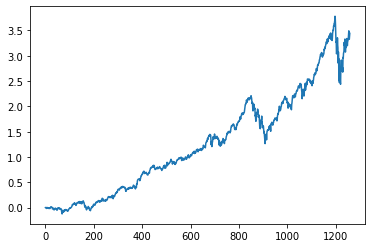

In [ ]:
# Plot the cumulative portfolio returns over time
cumulative_returns = ((1+returns['portfolio']).cumprod()-1)
cumulative_returns.plot()
plt.show()

# Equal weighted portfolios

In [ ]:
#How many stocks in this portfolio?
num_stocks = 9

In [ ]:
#Create an array of equal weights
portfolio_weights_ew = np.repeat(1/num_stocks, num_stocks)

In [ ]:
# Calculate the equally weighted portfolio returns
returns['portfolio_ew'] = returns.iloc[:, 0:num_stocks].mul(portfolio_weights_ew, axis=1).sum(axis=1)

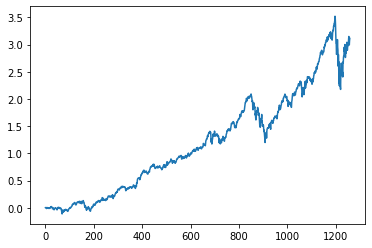

In [ ]:
#Plot our portfolios
ew_returns = ((1+returns['portfolio_ew']).cumprod()-1)
ew_returns.plot()
plt.show()

# Correlation Matrix

In [ ]:
returns.head()

,AMD,COST,JPM,V,DIS,TGT,NVDA,AAPL,MSFT,portfolio,portfolio_ew
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
1,-0.029787,-0.002254,0.008796,0.002359,0.002042,-0.005617,-0.006311,-0.000914,-0.002525,-0.004695,-0.003801
2,0.017544,-0.008585,-0.007881,-0.005442,-0.003203,0.003270,0.000000,-0.000083,0.000000,-0.000058,-0.000487
3,-0.017241,0.003114,0.002535,-0.005915,0.001655,0.015558,-0.006839,0.010234,-0.003452,0.000138,-0.000039
4,0.000000,-0.001817,-0.002697,0.003570,-0.001166,-0.001313,-0.001476,0.008730,-0.010855,-0.001223,-0.000780


In [ ]:
returns = returns.drop(['portfolio', 'portfolio_ew'], axis=1)
returns.head()

,AMD,COST,JPM,V,DIS,TGT,NVDA,AAPL,MSFT
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.029787,-0.002254,0.008796,0.002359,0.002042,-0.005617,-0.006311,-0.000914,-0.002525
2,0.017544,-0.008585,-0.007881,-0.005442,-0.003203,0.003270,0.000000,-0.000083,0.000000
3,-0.017241,0.003114,0.002535,-0.005915,0.001655,0.015558,-0.006839,0.010234,-0.003452
4,0.000000,-0.001817,-0.002697,0.003570,-0.001166,-0.001313,-0.001476,0.008730,-0.010855


In [ ]:
correlation_matrix = returns.corr()
correlation_matrix

,AMD,COST,JPM,V,DIS,TGT,NVDA,AAPL,MSFT
AMD,1.000000,0.226530,0.312655,0.369097,0.285641,0.209732,0.495115,0.374967,0.353224
COST,0.226530,1.000000,0.422233,0.474533,0.407078,0.487528,0.347889,0.487902,0.532679
JPM,0.312655,0.422233,1.000000,0.671951,0.623401,0.350607,0.439166,0.564473,0.614548
V,0.369097,0.474533,0.671951,1.000000,0.595008,0.329141,0.555420,0.661449,0.770454
DIS,0.285641,0.407078,0.623401,0.595008,1.000000,0.321022,0.392383,0.511172,0.542497
TGT,0.209732,0.487528,0.350607,0.329141,0.321022,1.000000,0.278768,0.331845,0.352289
NVDA,0.495115,0.347889,0.439166,0.555420,0.392383,0.278768,1.000000,0.539736,0.586320
AAPL,0.374967,0.487902,0.564473,0.661449,0.511172,0.331845,0.539736,1.000000,0.711009
MSFT,0.353224,0.532679,0.614548,0.770454,0.542497,0.352289,0.586320,0.711009,1.000000


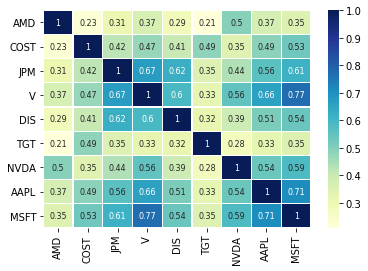

In [ ]:
# Create a heatmap
sns.heatmap(correlation_matrix,
            annot=True,
            cmap="YlGnBu", 
            linewidths=0.3,
            annot_kws={"size": 8})

# Plot aesthetics
plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

# Co-Variance Matrix

In [ ]:
returns.head()

,AMD,COST,JPM,V,DIS,TGT,NVDA,AAPL,MSFT
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.029787,-0.002254,0.008796,0.002359,0.002042,-0.005617,-0.006311,-0.000914,-0.002525
2,0.017544,-0.008585,-0.007881,-0.005442,-0.003203,0.003270,0.000000,-0.000083,0.000000
3,-0.017241,0.003114,0.002535,-0.005915,0.001655,0.015558,-0.006839,0.010234,-0.003452
4,0.000000,-0.001817,-0.002697,0.003570,-0.001166,-0.001313,-0.001476,0.008730,-0.010855


In [ ]:
cov_mat = returns.cov()
cov_mat

,AMD,COST,JPM,V,DIS,TGT,NVDA,AAPL,MSFT
AMD,0.001715,0.000126,0.000233,0.000250,0.000191,0.000166,0.000607,0.000281,0.000252
COST,0.000126,0.000181,0.000102,0.000104,0.000088,0.000126,0.000138,0.000119,0.000123
JPM,0.000233,0.000102,0.000323,0.000197,0.000181,0.000121,0.000233,0.000184,0.000190
V,0.000250,0.000104,0.000197,0.000267,0.000157,0.000103,0.000268,0.000195,0.000216
DIS,0.000191,0.000088,0.000181,0.000157,0.000261,0.000099,0.000188,0.000149,0.000151
TGT,0.000166,0.000126,0.000121,0.000103,0.000099,0.000367,0.000158,0.000115,0.000116
NVDA,0.000607,0.000138,0.000233,0.000268,0.000188,0.000158,0.000875,0.000289,0.000298
AAPL,0.000281,0.000119,0.000184,0.000195,0.000149,0.000115,0.000289,0.000328,0.000221
MSFT,0.000252,0.000123,0.000190,0.000216,0.000151,0.000116,0.000298,0.000221,0.000296


In [ ]:
#Annualize the co-variance matrix
cov_mat_annual = cov_mat * 252
cov_mat_annual

,AMD,COST,JPM,V,DIS,TGT,NVDA,AAPL,MSFT
AMD,0.432157,0.031796,0.058623,0.062880,0.048160,0.041913,0.152865,0.070821,0.063391
COST,0.031796,0.045589,0.025714,0.026257,0.022292,0.031644,0.034886,0.029930,0.031049
JPM,0.058623,0.025714,0.081351,0.049667,0.045603,0.030400,0.058829,0.046257,0.047851
V,0.062880,0.026257,0.049667,0.067158,0.039547,0.025930,0.067601,0.049249,0.054507
DIS,0.048160,0.022292,0.045603,0.039547,0.065779,0.025029,0.047265,0.037667,0.037983
TGT,0.041913,0.031644,0.030400,0.025930,0.025029,0.092413,0.039801,0.028983,0.029236
NVDA,0.152865,0.034886,0.058829,0.067601,0.047265,0.039801,0.220579,0.072830,0.075175
AAPL,0.070821,0.029930,0.046257,0.049249,0.037667,0.028983,0.072830,0.082546,0.055767
MSFT,0.063391,0.031049,0.047851,0.054507,0.037983,0.029236,0.075175,0.055767,0.074526


# Portfolio Standard Deviation

# The formula for portfoliovolatility is
the square root of the porfolio weight trasposed x covariance matrix of returns x portfolio weights

In [ ]:
transposed = portfolio_weights.T
transposed

array([0.12, 0.15, 0.08, 0.05, 0.09, 0.1 , 0.11, 0.14, 0.16])

In [ ]:
portfolio_volatility = np.sqrt(np.dot(portfolio_weights.T, np.dot(cov_mat_annual, 
                                                                  portfolio_weights)))
portfolio_volatility

0.23909751369428972